Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(143, 93, 13)


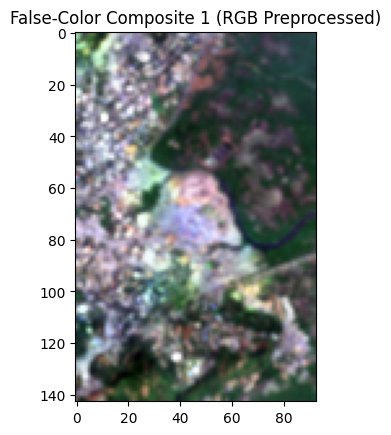

(143, 93, 13)


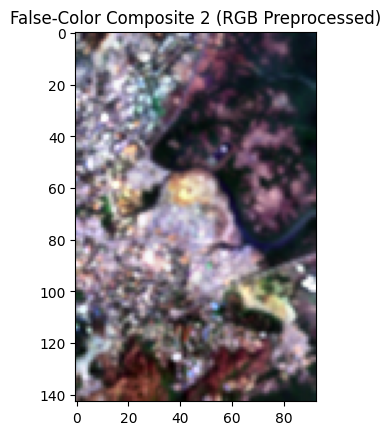

Shape of Image 1: (143, 93, 13)
Shape of Image 2: (143, 93, 13)


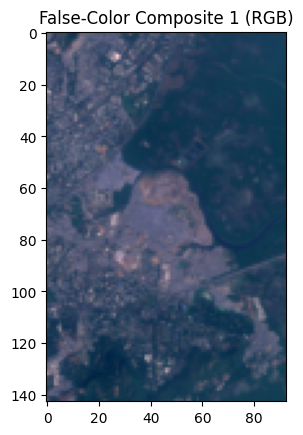

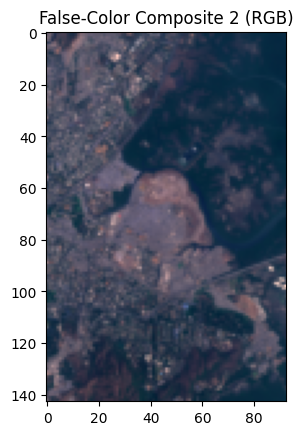

In [ ]:
!pip install rasterio
import rasterio
import numpy as np
import os
from rasterio.enums import Resampling
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

import tifffile as tiff
image_p1 = tiff.imread("/content/drive/MyDrive/IEEE/preprocessed_stacked_1.tif")
print(image_p1.shape)  # Output should be (Bands, Height, Width) or (Height, Width, Bands)

import numpy as np
import matplotlib.pyplot as plt

# Select RGB bands (indices for Red, Green, Blue)
rgb_bands = [3, 2, 1]  # Red, Green, Blue (B04, B03, B02)
rgb_image_1 = image_p1[:, :, rgb_bands]

# Normalize for display (scale 0-1)
rgb_image_1 = (rgb_image_1 - rgb_image_1.min()) / (rgb_image_1.max() - rgb_image_1.min())

# Plot the RGB image
plt.imshow(rgb_image_1)
plt.title("False-Color Composite 1 (RGB Preprocessed)")
plt.savefig("FalseColor_Composite_1_(RGBPP).png")
plt.show()

import tifffile as tiff
image_p2 = tiff.imread("/content/drive/MyDrive/IEEE/preprocessed_stacked_2.tif")
print(image_p2.shape)  # Output should be (Bands, Height, Width) or (Height, Width, Bands)

import numpy as np

# Select RGB bands (indices for Red, Green, Blue)
rgb_bands = [3, 2, 1]  # Red, Green, Blue (B04, B03, B02)
rgb_image_2 = image_p2[:, :, rgb_bands]

# Normalize for display (scale 0-1)
rgb_image_2 = (rgb_image_2 - rgb_image_2.min()) / (rgb_image_2.max() - rgb_image_2.min())

# Plot the RGB image
plt.imshow(rgb_image_2)
plt.title("False-Color Composite 2 (RGB Preprocessed)")
plt.savefig("FalseColor_Composite_2_(RGBPP).png")
plt.show()

# Step 2: Define Paths to Folders in Drive
folder1_path = "/content/drive/MyDrive/IEEE/imgs_1"  # Older image
folder2_path = "/content/drive/MyDrive/IEEE/imgs_2"  # Newer image

# Step 3: Function to Resample and Stack Images
def stack_bands(folder_path, target_shape=None, target_transform=None):
    band_files = sorted([os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith(".tif")])
    band_stack = []  # List to store resampled bands

    for i, file in enumerate(band_files):
        with rasterio.open(file) as src:
            if i == 0:
                # Use first band as reference for target shape & transform if not provided
                target_shape = target_shape or src.shape
                target_transform = target_transform or src.transform

            # Resample the band to match the target shape
            band_resampled = src.read(
                out_shape=(1, target_shape[0], target_shape[1]),  # Resize to target shape
                resampling=Resampling.bilinear
            )[0]  # Extract 2D array

            band_stack.append(band_resampled)

    return np.dstack(band_stack), target_shape, target_transform  # Return stacked array

# Step 4: Resample & Stack Both Images
image1, ref_shape, ref_transform = stack_bands(folder1_path)
image2, _, _ = stack_bands(folder2_path, ref_shape, ref_transform)

# Print Shape of Stacked Images
print("Shape of Image 1:", image1.shape)  # Should be (H, W, 13)
print("Shape of Image 2:", image2.shape)  # Should be (H, W, 13)



import numpy as np

# Select RGB bands (indices for Red, Green, Blue)
rgb_bands = [3, 2, 1]  # Red, Green, Blue (B04, B03, B02)
rgb_image_old1 = image1[:, :, rgb_bands]

# Normalize for display (scale 0-1)
rgb_image_old1 = (rgb_image_old1 - rgb_image_old1.min()) / (rgb_image_old1.max() - rgb_image_old1.min())

# Plot the RGB image
plt.imshow(rgb_image_old1)
plt.title("False-Color Composite 1 (RGB)")
plt.savefig("FalseColor_Composite_1_(RGB).png")
plt.show()

import numpy as np

# Select RGB bands (indices for Red, Green, Blue)
rgb_bands = [3, 2, 1]  # Red, Green, Blue (B04, B03, B02)
rgb_image_old2 = image2[:, :, rgb_bands]

# Normalize for display (scale 0-1)
rgb_image_old2 = (rgb_image_old2 - rgb_image_old2.min()) / (rgb_image_old2.max() - rgb_image_old2.min())

# Plot the RGB image
plt.imshow(rgb_image_old2)
plt.title("False-Color Composite 2 (RGB)")
plt.savefig("FalseColor_Composite_2_(RGB).png")
plt.show()


Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8             │ (None, 143, 93, 13)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ encoder (Functional)      │ [(None, 128), (None,   │     13,899,840 │ input_layer_8[0][0]    │
│                           │ 128), (None, 128)]     │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ decoder (Functional)      │ (None, 143, 93, 13)    │     27,982,733 │ encoder[0][2]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vae_loss_layer_8          │ (None, 143, 93, 13)    │              0 │ input_layer_8[0][0],   │
│ (VAELossLayer)            │                        │                │ decoder[0][0],         │
│                           │                        │                │ encoder[0][0],         │
│                           │                        │                │ encoder[0][1]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 41,882,573 (159.77 MB)

 Trainable params: 41,882,573 (159.77 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0725
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 27310.5547
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 5.6622
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 4.4813
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.9997
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8681
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4099
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1856
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0905
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0523
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0465
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0480
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0471
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0465
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0460
Epoch 16/50
1/1 ━━━━━━━━━━━━━━━━

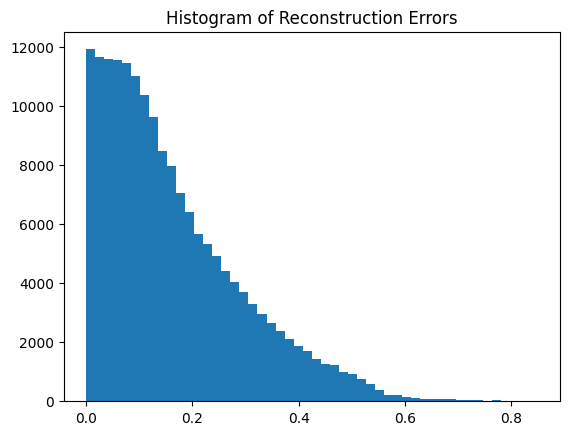

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (Input, Conv2D, Flatten, Dense, Reshape,
                                     Conv2DTranspose, Lambda, Cropping2D, Layer)
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

# ----- 1. Normalization Function -----
def normalize_image(image):
    """
    Normalize an image array so that its minimum becomes 0 and its maximum becomes 255.
    """
    image = image.astype(np.float32)
    norm_img = (image - np.min(image)) / (np.max(image) - np.min(image)) * 255.0
    return norm_img.astype(np.uint8)

# Assume image_p1 and image_p2 are loaded and have shape (143, 93, 13)
image_p1_norm = normalize_image(image_p1)
image_p2_norm = normalize_image(image_p2)

# Prepare data: scale images to [0,1] and add a batch dimension
input_shape = image_p1_norm.shape  # (143, 93, 13)
height, width, channels = input_shape
x_train = np.expand_dims(image_p1_norm, axis=0).astype('float32') / 255.0
x_test  = np.expand_dims(image_p2_norm, axis=0).astype('float32') / 255.0

# ----- 2. Define Best Hyperparameters -----
latent_dim = 128
conv_filters = 32
dense_units = 64
learning_rate = 0.0021517011159379964

# ----- 3. Custom Loss Layer for VAE -----
class VAELossLayer(Layer):
    def call(self, inputs):
        input_img, output_img, z_mean, z_log_var = inputs
        # Reconstruction loss (Mean Squared Error)
        reconstruction_loss = K.mean(K.square(input_img - output_img))
        # KL divergence loss
        kl_loss = -0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
        self.add_loss(reconstruction_loss + kl_loss)
        return output_img

# ----- 4. Build the VAE Model with Fixed Hyperparameters -----
def build_vae_model_fixed():
    # Sampling function for the latent space.
    def sampling(args):
        z_mean, z_log_var = args
        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]
        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon

    # --- Encoder ---
    input_img = Input(shape=input_shape)
    x = Conv2D(conv_filters, (3, 3), activation='relu', padding='same')(input_img)
    # Downsample with stride 2. With 'same' padding, output dims become: (ceil(143/2)=72, ceil(93/2)=47)
    x = Conv2D(conv_filters * 2, (3, 3), activation='relu', padding='same', strides=(2, 2))(x)
    # Capture the downsampled feature map shape (e.g., (72, 47, conv_filters*2))
    conv_shape = K.int_shape(x)[1:]
    x = Flatten()(x)
    x = Dense(dense_units, activation='relu')(x)
    z_mean = Dense(latent_dim, name='z_mean')(x)
    z_log_var = Dense(latent_dim, name='z_log_var')(x)
    z = Lambda(sampling, name='z')([z_mean, z_log_var])
    encoder = Model(input_img, [z_mean, z_log_var, z], name='encoder')

    # --- Decoder ---
    latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
    flat_dim = conv_shape[0] * conv_shape[1] * conv_shape[2]
    x_dec = Dense(flat_dim, activation='relu')(latent_inputs)
    x_dec = Reshape(conv_shape)(x_dec)
    # Upsample: from (72,47) to roughly (144,94)
    x_dec = Conv2DTranspose(conv_filters * 2, (3, 3), activation='relu', padding='same', strides=(2, 2))(x_dec)
    decoded = Conv2DTranspose(channels, (3, 3), activation='sigmoid', padding='same')(x_dec)
    # Crop the extra row and column (output becomes (144,94,channels) but input is (143,93,channels))
    final_output = Cropping2D(cropping=((0, 1), (0, 1)))(decoded)
    decoder = Model(latent_inputs, final_output, name='decoder')

    # --- VAE Assembly using the custom loss layer ---
    z_mean_enc, z_log_var_enc, z_enc = encoder(input_img)
    output_img = decoder(z_enc)
    vae_output = VAELossLayer()([input_img, output_img, z_mean_enc, z_log_var_enc])
    vae = Model(input_img, vae_output, name='vae')
    vae.compile(optimizer=tf.keras.optimizers.Adam(learning_rate))
    return vae

# Build the model
vae = build_vae_model_fixed()
vae.summary()

# ----- 5. Train the VAE on image_p1 -----
history = vae.fit(x_train, epochs=50, batch_size=1, verbose=1)

# ----- 6. Change Detection on image_p2 -----
# Reconstruct image_p2 using the trained model
reconstructed_img_p2 = vae.predict(x_test)
reconstructed_img_p2 = np.squeeze(reconstructed_img_p2, axis=0)
x_test_img = np.squeeze(x_test, axis=0)

# Compute the absolute difference (change map) between image_p2 and its reconstruction
change_map = np.abs(x_test_img - reconstructed_img_p2)



plt.hist(change_map.flatten(), bins=50)
plt.title("Histogram of Reconstruction Errors")
plt.show()


Estimated elbow threshold: 0.2460


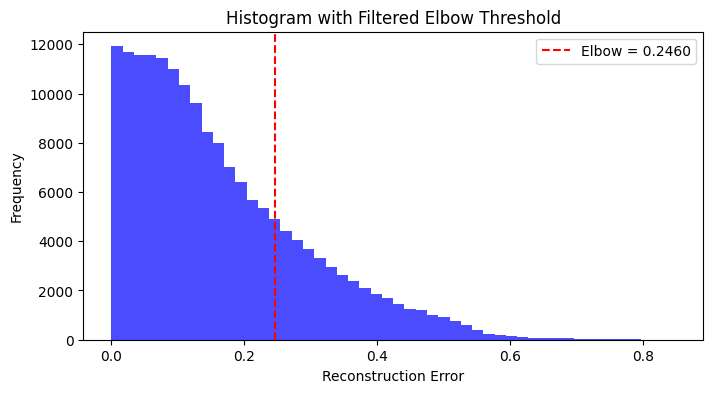

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume change_map is your array of reconstruction errors
errors = change_map.flatten()

# Compute histogram with enough bins
counts, bin_edges = np.histogram(errors, bins=50)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Filter: only consider bins with centers above a minimum threshold (e.g., 0.2)
min_error_value = 0.2
valid_idx = bin_centers >= min_error_value
filtered_bin_centers = bin_centers[valid_idx]
filtered_counts = counts[valid_idx]

# Optionally, smooth the counts (for example, using a simple moving average)
def smooth(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

smoothed_counts = smooth(filtered_counts, window_size=3)

# Compute the derivative on the smoothed counts
derivative = np.diff(smoothed_counts)

# The elbow is where the drop is steepest
elbow_index = np.argmin(derivative)
elbow_threshold = filtered_bin_centers[elbow_index]

print(f"Estimated elbow threshold: {elbow_threshold:.4f}")

# Visualize the histogram and the estimated elbow threshold
plt.figure(figsize=(8, 4))
plt.hist(errors, bins=50, color='blue', alpha=0.7)
plt.axvline(elbow_threshold, color='red', linestyle='--', label=f'Elbow = {elbow_threshold:.4f}')
plt.title("Histogram with Filtered Elbow Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.savefig("Histogram_with_Filtered_Elbow_Threshold.png")
plt.show()


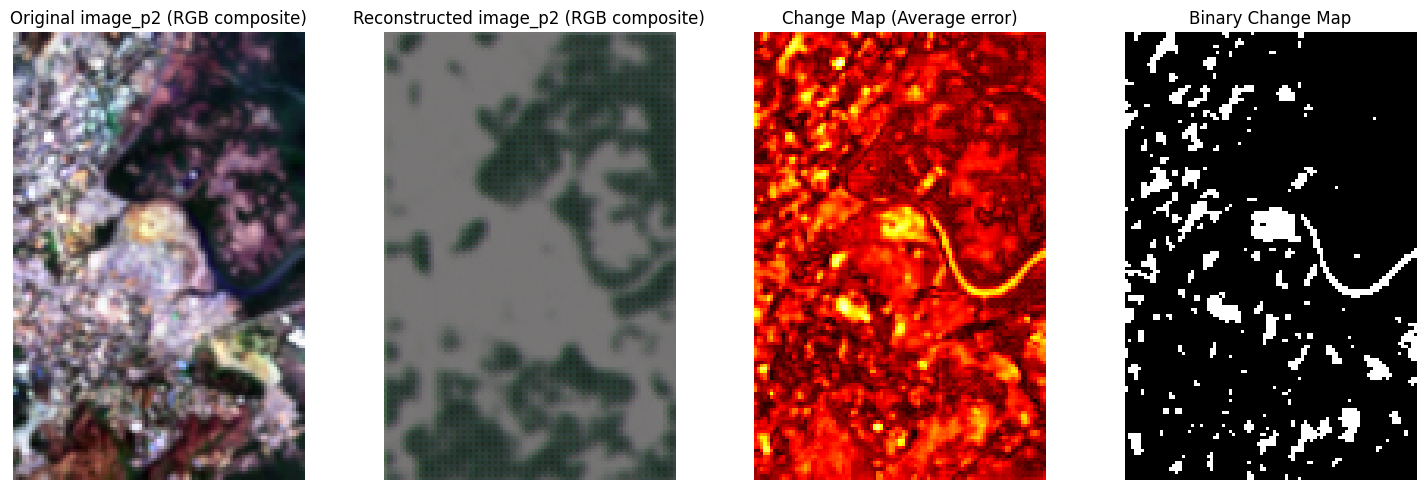

In [ ]:
# ----- 7. Thresholding to Generate a Binary Change Map -----
# Calculate a threshold (using the 95th percentile). If the output is too dark,
# consider lowering the percentile (e.g., 90 or 85) to capture more subtle differences.
threshold = elbow_threshold

binary_change_map = (change_map > threshold).astype(np.uint8)

# For visualization, average the change map across spectral bands
change_map_avg = np.mean(change_map, axis=-1)
binary_change_map_avg = (change_map_avg > threshold).astype(np.uint8)

# ----- 8. Visualization -----
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.title("Original image_p2 (RGB composite)")
# For a pseudo-RGB composite, using bands 4, 3, 2 (adjust indices as needed)
plt.imshow(x_test_img[:, :, [3, 2, 1]])
plt.axis('off')
plt.savefig("Original_image_p2_(RGB_composite).png")

plt.subplot(1, 4, 2)
plt.title("Reconstructed image_p2 (RGB composite)")
plt.imshow(reconstructed_img_p2[:, :, [3, 2, 1]])
plt.axis('off')
plt.savefig("Reconstructed_image_p2_(RGB_composite).png")

plt.subplot(1, 4, 3)
plt.title("Change Map (Average error)")
plt.imshow(change_map_avg, cmap='hot')
plt.axis('off')
plt.savefig("Change_Map_(Average_error).png")

plt.subplot(1, 4, 4)
plt.title("Binary Change Map")
plt.imshow(binary_change_map_avg, cmap='gray')
plt.axis('off')
plt.savefig("Binary_Change_Map.png")

plt.tight_layout()
plt.show()

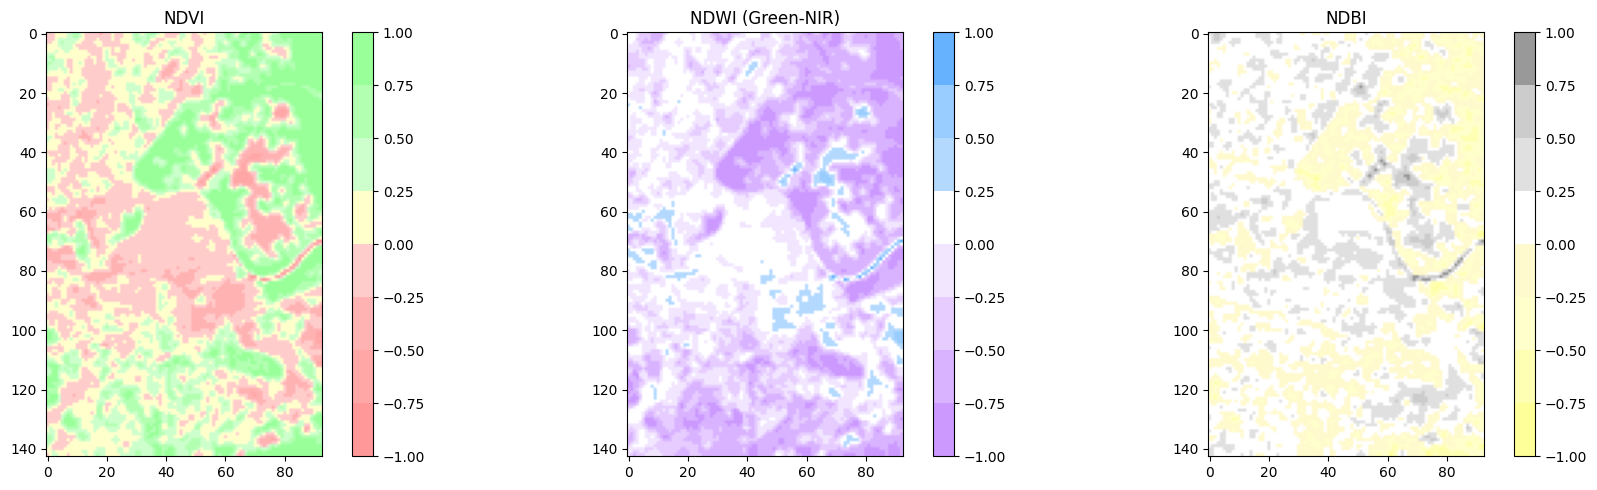

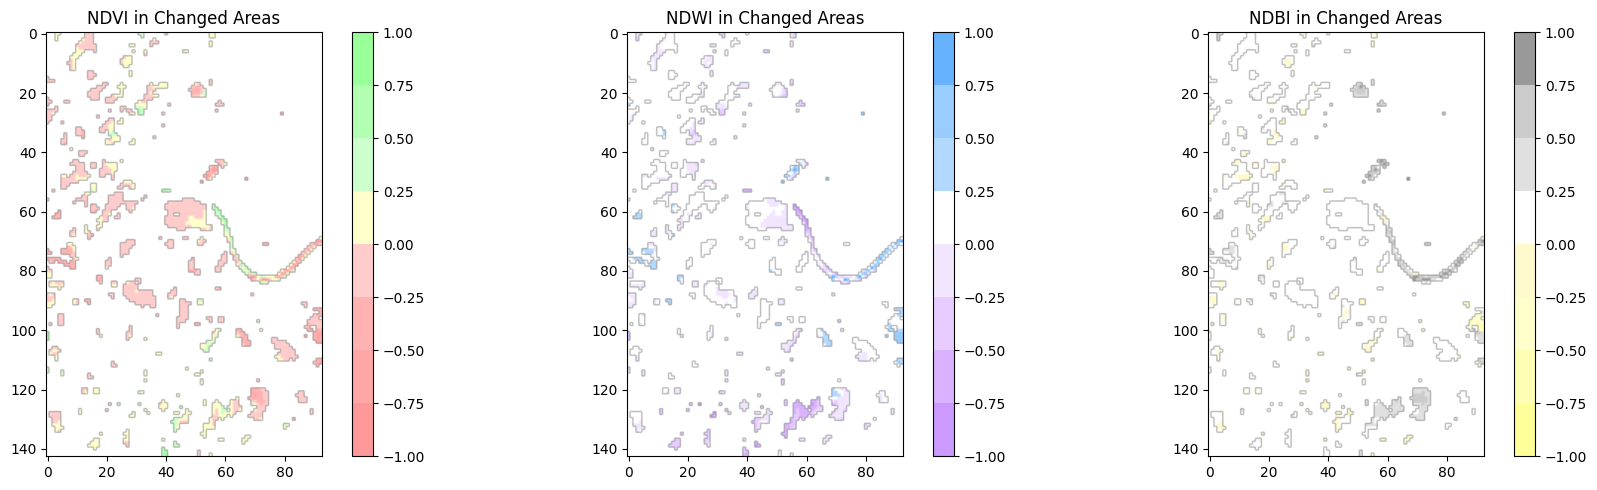

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

#############################################
# 1. Define Functions for Spectral Indices
#############################################
def calculate_ndvi(image):
    """
    NDVI = (NIR - Red) / (NIR + Red)
    Assumptions:
      - Red is at index 3 (Band 4)
      - NIR is at index 7 (Band 8)
    """
    image = image.astype(np.float32)
    red = image[:, :, 3]
    nir = image[:, :, 7]
    ndvi = (nir - red) / (nir + red + 1e-6)
    return ndvi

def calculate_ndwi(image):
    """
    NDWI = (Green - NIR) / (Green + NIR)
    Assumptions:
      - Green is at index 2 (Band 3)
      - NIR is at index 7 (Band 8)
    """
    image = image.astype(np.float32)
    green = image[:, :, 2]
    nir = image[:, :, 7]
    ndwi = (green - nir) / (green + nir + 1e-6)
    return ndwi

def calculate_ndbi(image):
    """
    NDBI = (SWIR - NIR) / (SWIR + NIR)
    Assumptions:
      - SWIR is at index 10 (Band 11)
      - NIR is at index 7 (Band 8)
    """
    image = image.astype(np.float32)
    swir = image[:, :, 10]
    nir = image[:, :, 7]
    ndbi = (swir - nir) / (swir + nir + 1e-6)
    return ndbi

#############################################
# 2. Prepare the Image Data
#############################################
# Assume image_p2_norm is your normalized image (values 0-255)
# Convert to float in range [0,1]:
image_for_indices = image_p2_norm.astype(np.float32) / 255.0

# Calculate the indices
ndvi = calculate_ndvi(image_for_indices)
ndwi = calculate_ndwi(image_for_indices)
ndbi = calculate_ndbi(image_for_indices)

#############################################
# 3. Create Discrete, Pastel Colormaps with 9 Sections
#############################################
# Define boundaries for nine sections: 10 boundaries dividing the range [-1,1]
boundaries = [-1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0]

# --- NDWI Colormap ---
# Negative: pastel purple; near 0: white; positive: pastel blue.
ndwi_colors = [
    "#CC99FF",  # very negative CC99FF
    "#D9B3FF",  # moderately very negative D9B3FF
    "#E6CCFF",  # moderately negative E6CCFF
    "#F2E6FF",  # slightly negative F2E6FF
    "#FFFFFF",  # around zero
    "#B3D9FF",  # slightly positive
    "#99CCFF",  # moderately positive
    "#80BFFF",  # very positive
    "#66B2FF"   # extremely positive
]
ndwi_cmap = ListedColormap(ndwi_colors)
ndwi_norm = BoundaryNorm(boundaries, ndwi_cmap.N)

# --- NDBI Colormap ---
# Negative: pastel yellow; near 0: white; positive: pastel grey.
ndbi_colors = [
    "#FFFF99",  # very negative: lemon chiffon FFFF99
    "#FFFFB3",  # moderately very negative FFFFB3
    "#FFFFCC",  # moderately negative FFFFCC
    "#FFFACD",  # slightly negative FFFACD
    "#FFFFFF",  # around zero
    "#E0E0E0",  # slightly positive
    "#CCCCCC",  # moderately positive
    "#B3B3B3",  # very positive
    "#999999"   # extremely positive
]
ndbi_cmap = ListedColormap(ndbi_colors)
ndbi_norm = BoundaryNorm(boundaries, ndbi_cmap.N)

# --- NDVI Colormap ---
# We'll transition from red (low) to green (high) in pastel tones.
ndvi_colors = [
    "#FF9999",  # very low NDVI: light red FF9999
    "#FFA6A6",  # moderately very low FFA6A6
    "#FFB2B2",  # moderately low FFB2B2
    "#FFCCCC",  # slightly low FFCCCC
    "#FFFFCC",  # around zero: light yellow
    "#CCFFCC",  # slightly high: light green
    "#B2FFB2",  # moderately high
    "#A6FFA6",  # very high
    "#99FF99"   # extremely high NDVI: pastel green
]
ndvi_cmap = ListedColormap(ndvi_colors)
ndvi_norm = BoundaryNorm(boundaries, ndvi_cmap.N)

#############################################
# 4. Visualize the Indices for the Whole Image
#############################################
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(ndvi, cmap=ndvi_cmap, norm=ndvi_norm)
plt.title("NDVI")
plt.colorbar(ticks=boundaries)

plt.subplot(1, 3, 2)
plt.imshow(ndwi, cmap=ndwi_cmap, norm=ndwi_norm)
plt.title("NDWI (Green-NIR)")
plt.colorbar(ticks=boundaries)

plt.subplot(1, 3, 3)
plt.imshow(ndbi, cmap=ndbi_cmap, norm=ndbi_norm)
plt.title("NDBI")
plt.colorbar(ticks=boundaries)

plt.savefig("Indices_for_the_Whole_Image.png")
plt.tight_layout()
plt.show()

#############################################
# 5. Mask the Indices Using the Binary Change Map
#############################################
# Assume binary_change_map_avg is your binary change map (shape matching indices)
ndvi_changes = np.where(binary_change_map_avg, ndvi, np.nan)
ndwi_changes = np.where(binary_change_map_avg, ndwi, np.nan)
ndbi_changes = np.where(binary_change_map_avg, ndbi, np.nan)

#############################################
# 6. Visualize the Indices in Changed Areas with Custom Colormaps
#############################################
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(ndvi_changes, cmap=ndvi_cmap, norm=ndvi_norm)
plt.title("NDVI in Changed Areas")
plt.colorbar(ticks=boundaries)
plt.savefig("Indices_in_Changed_Areas.png")

plt.subplot(1, 3, 2)
plt.imshow(ndwi_changes, cmap=ndwi_cmap, norm=ndwi_norm)
plt.title("NDWI in Changed Areas")
plt.colorbar(ticks=boundaries)
plt.savefig("Indices_in_Changed_Areas.png")

plt.subplot(1, 3, 3)
plt.imshow(ndbi_changes, cmap=ndbi_cmap, norm=ndbi_norm)
plt.title("NDBI in Changed Areas")
plt.colorbar(ticks=boundaries)
plt.savefig("Indices_in_Changed_Areas.png")

plt.tight_layout()
plt.show()


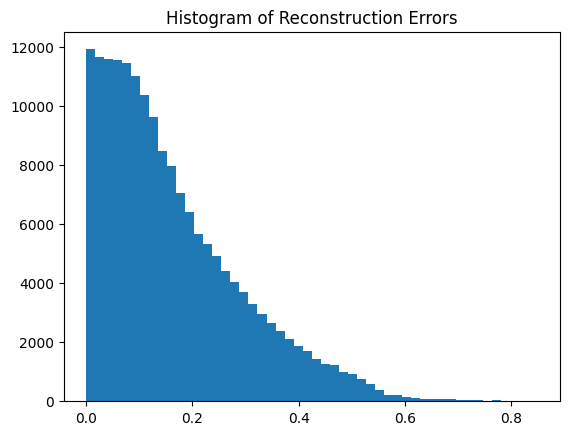

In [ ]:
plt.hist(change_map.flatten(), bins=50)
plt.savefig("Histogram_of_reconstruction_errors.png")
plt.title("Histogram of Reconstruction Errors")
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Assume ndvi_changes, ndwi_changes, ndbi_changes are computed as:
# ndvi_changes = np.where(binary_change_map_avg, ndvi, np.nan)
# ndwi_changes = np.where(binary_change_map_avg, ndwi, np.nan)
# ndbi_changes = np.where(binary_change_map_avg, ndbi, np.nan)

def compute_positive_negative_stats(index_array):
    """
    Compute the percentage of positive and negative values in the index array,
    ignoring NaNs.
    Returns a dictionary with the percentages.
    """
    # Flatten the array and remove NaNs
    valid_pixels = index_array[~np.isnan(index_array)]
    total = valid_pixels.size
    if total == 0:
        return {"Total Pixels": 0, "Positive (%)": np.nan, "Negative (%)": np.nan}

    positive_count = np.sum(valid_pixels > 0)
    negative_count = np.sum(valid_pixels < 0)

    positive_pct = (positive_count / total) * 100
    negative_pct = (negative_count / total) * 100

    return {
        "Total Pixels": total,
        "Positive (%)": positive_pct,
        "Negative (%)": negative_pct
    }

# Compute statistics for each index
ndvi_stats = compute_positive_negative_stats(ndvi_changes)
ndwi_stats = compute_positive_negative_stats(ndwi_changes)
ndbi_stats = compute_positive_negative_stats(ndbi_changes)

# Create a DataFrame for easier export
data = {
    "Index": ["NDVI", "NDWI", "NDBI"],
    "Total Changed Pixels": [ndvi_stats["Total Pixels"], ndwi_stats["Total Pixels"], ndbi_stats["Total Pixels"]],
    "Positive (%)": [ndvi_stats["Positive (%)"], ndwi_stats["Positive (%)"], ndbi_stats["Positive (%)"]],
    "Negative (%)": [ndvi_stats["Negative (%)"], ndwi_stats["Negative (%)"], ndbi_stats["Negative (%)"]]
}

df = pd.DataFrame(data)

# Print the DataFrame to review
print(df)

# Export to a CSV file (or Excel if desired)
df.to_csv("change_statistics.csv", index=False)
# For Excel, you can use: df.to_excel("change_statistics.xlsx", index=False)


  Index  Total Changed Pixels  Positive (%)  Negative (%)
0  NDVI                  1481     31.532748     67.251857
1  NDWI                  1481     54.962863     43.821742
2  NDBI                  1481     84.875084     14.787306
